In [1]:
%matplotlib inline

In [156]:
run donors.py

In [157]:
st = DonorSingletTriplet()

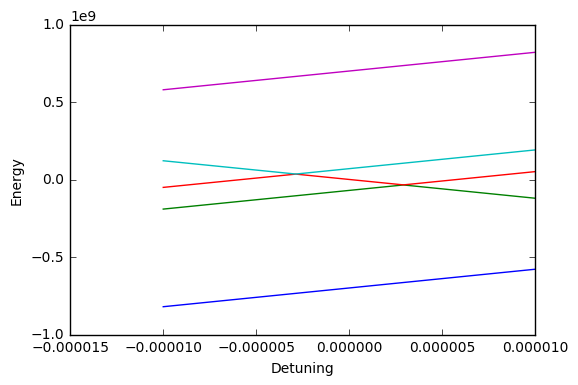

In [127]:
# plt.ylim(-0.2e9,0.2e9)
st.plot_spectrum_vs_detuning(-10e-6,10e-6,b_z=0.05,dBz=0.005,tc=10e3, alpha=0.1)

In [131]:
# vals, vecs = st.Hamiltonian.eigenstates()
0.5*0.005*st.electron_gyro/(2*np.pi)/1e6

69.98122520600462

In [56]:
# The project_eigenvecs function seems to be working fine
st.project_eigenvecs(vecs[4])

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [96]:
# Ok, now let's try and do a detuning pulse, and plot the projection vector over time
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(50e-6,-50e-6, psi0=st.S20, ramp_time=10e-6, tunnel_coupling=100e6, options=opts)

10.0%. Run time:   4.01s. Est. time left: 00:00:00:36
20.0%. Run time:   7.26s. Est. time left: 00:00:00:29
30.0%. Run time:  10.05s. Est. time left: 00:00:00:23
40.0%. Run time:  12.43s. Est. time left: 00:00:00:18
50.0%. Run time:  14.38s. Est. time left: 00:00:00:14
60.0%. Run time:  16.41s. Est. time left: 00:00:00:10
70.0%. Run time:  18.83s. Est. time left: 00:00:00:08
80.0%. Run time:  21.69s. Est. time left: 00:00:00:05
90.0%. Run time:  25.09s. Est. time left: 00:00:00:02
Total run time:  28.96s


In [116]:
def plot_projections(output, times):
# Pre-allocate array to store projections in
    proj_vector = np.zeros((len(times), 7))
    for ind,val in enumerate(output.states):
        proj_vector[ind] = st.project_eigenvecs(val)
    plt.plot(times, proj_vector)
    plt.ylim(-0.1,1.1)
    plt.legend(['S11', 'T-', 'T0', 'T+', 'S20', 'UpDn', 'DnUp'])
    plt.xlabel('Time (s)')
    plt.ylabel('Projection')
    plt.show()
    return proj_vector

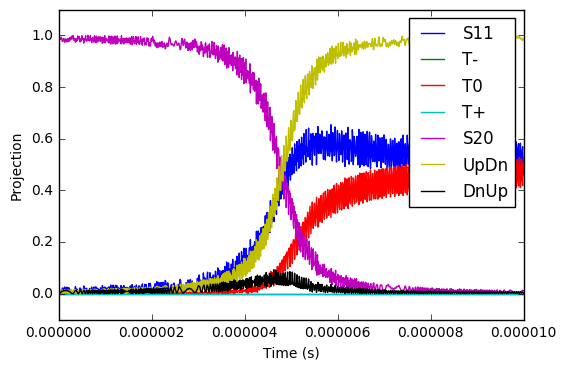

In [100]:
plot_projections(output, times)

In [107]:
# Now let's do the detuning pulse with tc < dBz 
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(30e-6,-30e-6, psi0=st.S20, ramp_time=100e-6, tunnel_coupling=1e6, options=opts)

10.0%. Run time:  15.62s. Est. time left: 00:00:02:20
20.0%. Run time:  28.16s. Est. time left: 00:00:01:52
30.0%. Run time:  37.70s. Est. time left: 00:00:01:27
40.0%. Run time:  44.19s. Est. time left: 00:00:01:06
50.0%. Run time:  48.23s. Est. time left: 00:00:00:48
60.0%. Run time:  54.35s. Est. time left: 00:00:00:36
70.0%. Run time:  64.05s. Est. time left: 00:00:00:27
80.0%. Run time:  78.09s. Est. time left: 00:00:00:19
90.0%. Run time:  95.84s. Est. time left: 00:00:00:10
Total run time: 117.01s


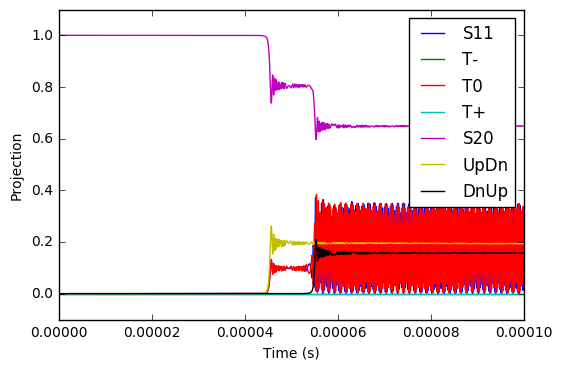

In [108]:
plot_projections(output, times)

# Interesting, you can see the two steps down in S20 population as you go over the two anti-crossings. With tc< delta_Bz then there are two anti-crossings, one for each of the updn and dnup branches with the S20.

10.0%. Run time: 153.77s. Est. time left: 00:00:23:03
20.0%. Run time: 270.03s. Est. time left: 00:00:18:00
30.0%. Run time: 356.20s. Est. time left: 00:00:13:51
40.0%. Run time: 410.39s. Est. time left: 00:00:10:15
50.0%. Run time: 438.75s. Est. time left: 00:00:07:18
60.0%. Run time: 489.93s. Est. time left: 00:00:05:26
70.0%. Run time: 577.66s. Est. time left: 00:00:04:07
80.0%. Run time: 685.97s. Est. time left: 00:00:02:51
90.0%. Run time: 825.55s. Est. time left: 00:00:01:31
Total run time: 974.19s


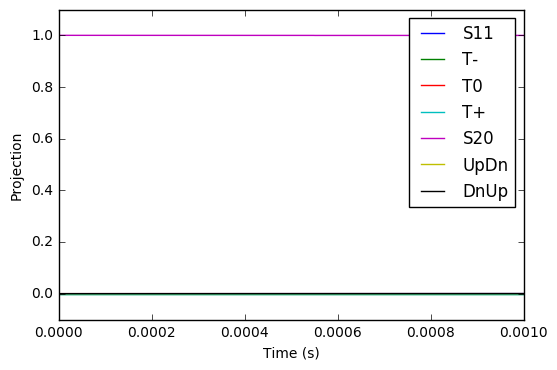

In [109]:
# Now let's do the detuning pulse with tc=10e3 and ramp time 1 ms 
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(30e-6,-30e-6, psi0=st.S20, ramp_time=1e-3, tunnel_coupling=10e3, options=opts)
plot_projections(output, times)

10.0%. Run time: 739.34s. Est. time left: 00:01:50:54
20.0%. Run time: 1312.35s. Est. time left: 00:01:27:29
30.0%. Run time: 1722.85s. Est. time left: 00:01:06:59
40.0%. Run time: 1970.36s. Est. time left: 00:00:49:15
50.0%. Run time: 2110.55s. Est. time left: 00:00:35:10
60.0%. Run time: 2360.79s. Est. time left: 00:00:26:13
70.0%. Run time: 2765.48s. Est. time left: 00:00:19:45
80.0%. Run time: 3189.99s. Est. time left: 00:00:13:17
90.0%. Run time: 3758.65s. Est. time left: 00:00:06:57
Total run time: 4506.17s


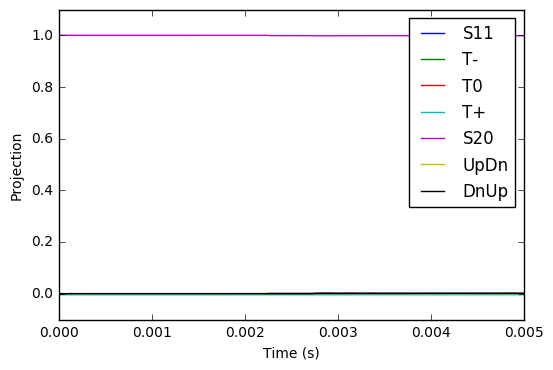

In [110]:
# Now with tc=10e3 and ramp time 5 ms 
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(30e-6,-30e-6, psi0=st.S20, ramp_time=5e-3, tunnel_coupling=10e3, options=opts)
plot_projections(output, times)

# Interesting, am I still scanning so fast relative to the tunnel coupling that I still just stay in S20?

10.0%. Run time:  76.42s. Est. time left: 00:00:11:27
20.0%. Run time: 136.83s. Est. time left: 00:00:09:07
30.0%. Run time: 180.27s. Est. time left: 00:00:07:00
40.0%. Run time: 208.55s. Est. time left: 00:00:05:12
50.0%. Run time: 224.38s. Est. time left: 00:00:03:44
60.0%. Run time: 249.86s. Est. time left: 00:00:02:46
70.0%. Run time: 291.99s. Est. time left: 00:00:02:05
80.0%. Run time: 353.61s. Est. time left: 00:00:01:28
90.0%. Run time: 438.41s. Est. time left: 00:00:00:48
Total run time: 534.20s


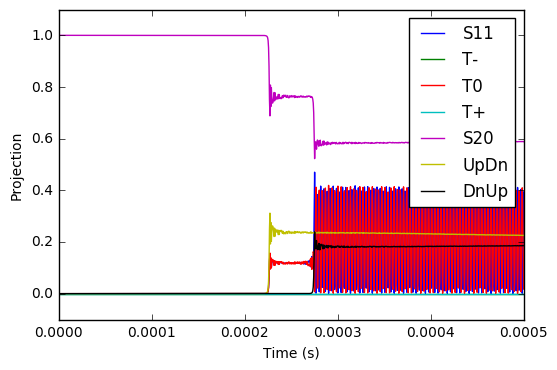

In [115]:
# Set tc to 500kHz, ramp time 0.5e-3
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(30e-6,-30e-6, psi0=st.S20, ramp_time=0.5e-3, tunnel_coupling=0.5e6, options=opts)
proj_vector = plot_projections(output, times)

Again, you see that double step. What is going on with the oscillations that start up after the second step? Are those delta Bz driven singlet-triplet oscillations? Zooming in for a closer look

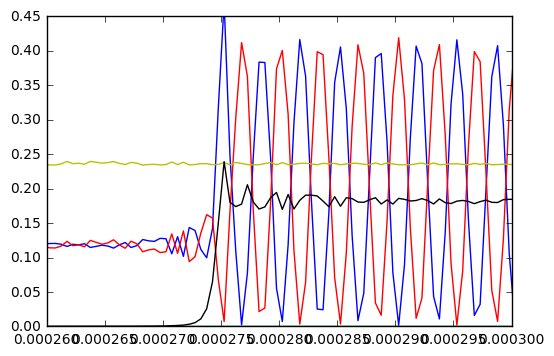

In [121]:
plt.plot(times, proj_vector)
plt.ylim(0,0.45)
plt.xlim(0.00026, 0.0003)
plt.show()

In [124]:
num_oscill = 7.5
dt = 0.0003 - 0.00027
freq = noum_scill/dt
print(freq)

250000.00000000026


So it looks like these oscillations are happening at 250kHz, which is half of the tunnel coupling in this case. So I guess those oscillations are something Landau-Zener related perhaps? 

10.0%. Run time: 541.36s. Est. time left: 00:01:21:12
20.0%. Run time: 976.05s. Est. time left: 00:01:05:04
30.0%. Run time: 1302.09s. Est. time left: 00:00:50:38
40.0%. Run time: 1545.38s. Est. time left: 00:00:38:38
50.0%. Run time: 1824.44s. Est. time left: 00:00:30:24
60.0%. Run time: 2271.25s. Est. time left: 00:00:25:14
70.0%. Run time: 2781.30s. Est. time left: 00:00:19:51
80.0%. Run time: 3140.96s. Est. time left: 00:00:13:05
90.0%. Run time: 3572.83s. Est. time left: 00:00:06:36
Total run time: 4121.61s


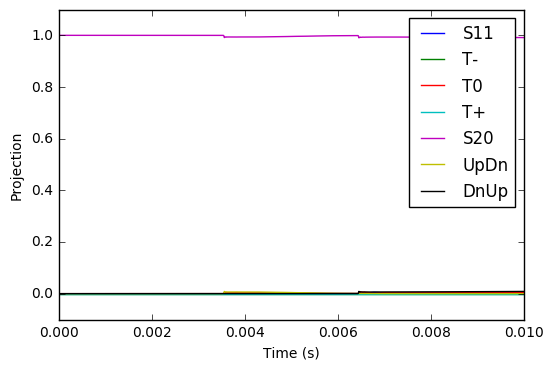

In [134]:
# Now running the simulation with tc set to 10kHz, ramp time 10ms
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(10e-6,-10e-6, psi0=st.S20, ramp_time=10e-3, tunnel_coupling=10e3, options=opts)
proj_vector = plot_projections(output, times)

In [135]:
qu.qsave(output, 'tc_10kHz_ramp_10ms_10uV_minus10uV')

10.0%. Run time: 5662.73s. Est. time left: 00:14:09:24
20.0%. Run time: 10344.90s. Est. time left: 00:11:29:39
30.0%. Run time: 14049.90s. Est. time left: 00:09:06:23
40.0%. Run time: 16834.11s. Est. time left: 00:07:00:51
50.0%. Run time: 20075.84s. Est. time left: 00:05:34:35
60.0%. Run time: 24381.59s. Est. time left: 00:04:30:54
70.0%. Run time: 27481.55s. Est. time left: 00:03:16:17
80.0%. Run time: 31209.10s. Est. time left: 00:02:10:02
90.0%. Run time: 36080.36s. Est. time left: 00:01:06:48
Total run time: 41656.96s


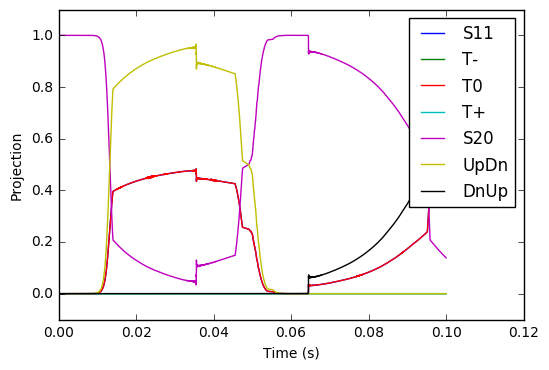

In [136]:
# Now running the simulation with tc set to 10kHz, ramp time 100ms
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(10e-6,-10e-6, psi0=st.S20, ramp_time=100e-3, tunnel_coupling=10e3, 
                                     options=opts, num_points=5000)
proj_vector = plot_projections(output, times)
qu.qsave(output, 'tc_10kHz_ramp_100ms_10uV_minus10uV')

# What on earth is going on here?

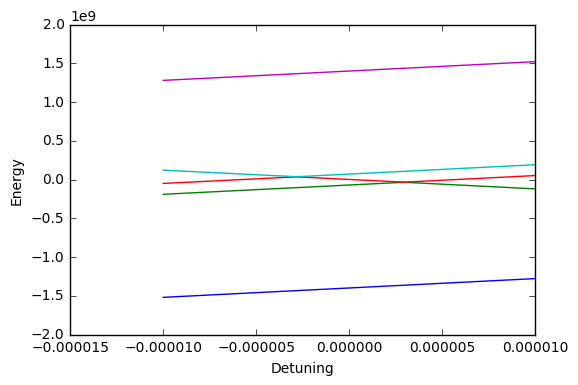

In [160]:
# Let's have a look at the spectrum with the same parameters
# plt.xlim(-3e-6,-2.8e-6)
# plt.ylim(3.45e7,3.55e7)
plt = st.plot_spectrum_vs_detuning(-10e-6,10e-6,b_z=0.1,dBz=0.005,tc=10e3, alpha=0.1, num_points=5000)

Possibly I started the pulse (at 10uV in detuning) too close to the anti-crossing?

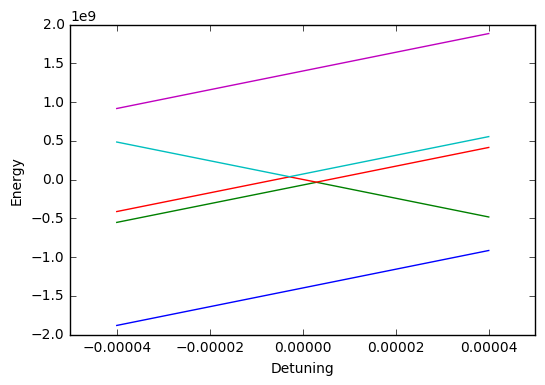

In [161]:
# Let's run an experiment starting from 30uV in detuning
# Plot the spectrum first
plt = st.plot_spectrum_vs_detuning(-40e-6,40e-6,b_z=0.1,dBz=0.005,tc=10e3, alpha=0.1, num_points=5000)

In [ ]:
# Now running the simulation with tc set to 10kHz, ramp time 100ms, detuning from 30uV to -30uV
opts = qu.Options(nsteps=100000)
output, times = st.do_detuning_pulse(30e-6,-30e-6, psi0=st.S20, ramp_time=100e-3, tunnel_coupling=10e3, 
                                     options=opts, num_points=5000)
proj_vector = plot_projections(output, times)
qu.qsave(output, 'tc_10kHz_ramp_100ms_30uV_minus30uV')